In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

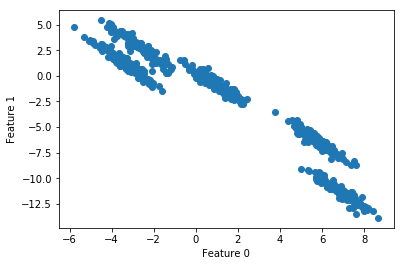

In [2]:
# Generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers=5)
rng = np.random.RandomState(74)

# Transform data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Plot
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

## 1. Let´s apply K-means clustering

Text(0,0.5,'Feature 1')

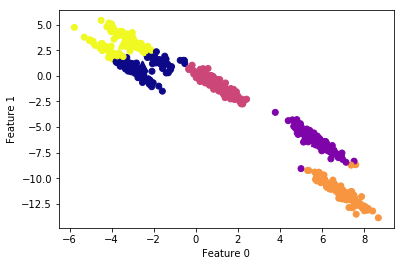

In [8]:
# Cluster the data into 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Plot the cluster assignments and cluster centers
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            marker='^',
            c=[0, 1, 2, 3, 4],
            s=100,
            linewidth=2,
            cmap="plasma")

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Conclussion
These groups are stretched toward the diagonal. As k-means only considers the distance to the nearest cluster center, it can´t handle this kind of data

## 2. DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Text(0,0.5,'Feature 1')

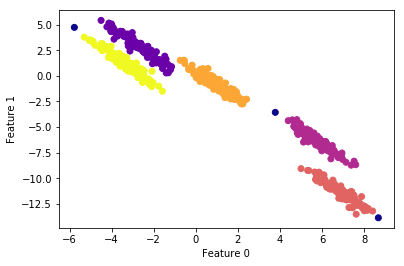

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples=2)
clusters = dbscan.fit_predict(X_scaled)

# Plot the cluster assgnments
plt.scatter(X[:,0], X[:,1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Measure performance

In [11]:
from sklearn.metrics import adjusted_rand_score

In [13]:
# k-means performance:
print("Kmeans ARI =", adjusted_rand_score(y, y_pred).round(2))

# DBSCAN performance:
print("DBSCAN ARI =", adjusted_rand_score(y, clusters).round(2))

Kmeans ARI = 0.76
DBSCAN ARI = 0.99
